### Implementation

Below are the implementations of the given solvers and my own implemented eulers method. <br>
For both test cases I created the functions using the parameters and functions given, then fed the function either into the solver or my eulers method. <br>
For test case a I was able to calculate the absolute and relative error as the exact solutions were give, however were not given for part b. <br>
To choose what test case and method you just change the strings under 'setting up the simulation'

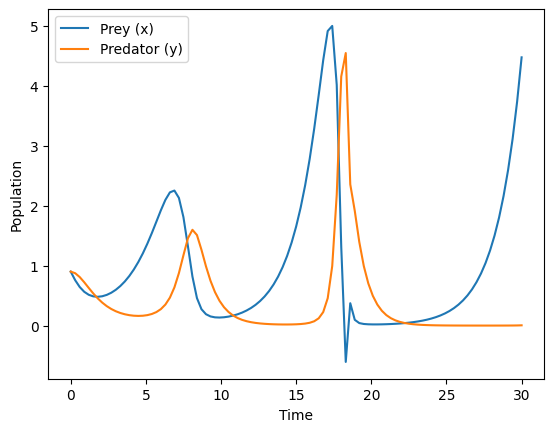

Method chosen: Eulers Method
dt/timestep: 100 
Solving took 0.0009975433349609375 seconds.


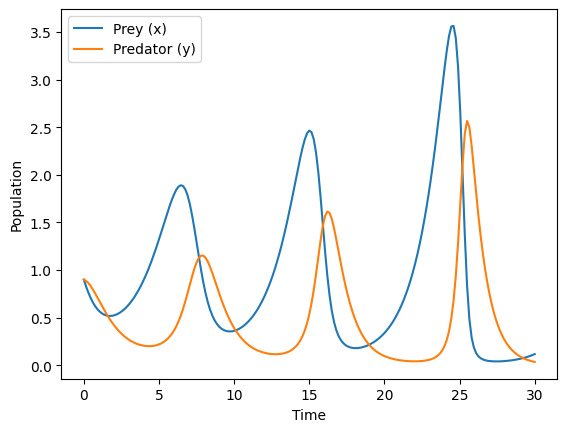

Method chosen: Eulers Method
dt/timestep: 200 
Solving took 0.000997304916381836 seconds.


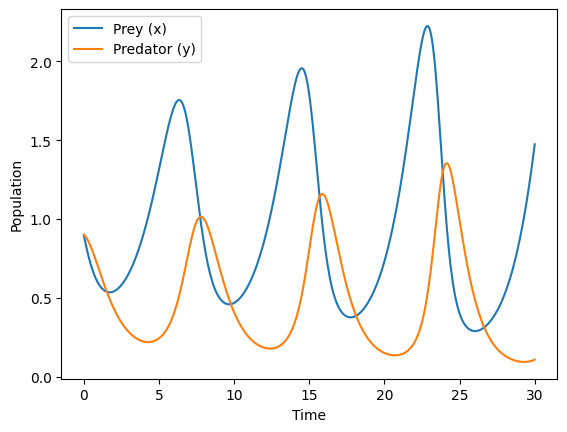

Method chosen: Eulers Method
dt/timestep: 400 
Solving took 0.001994609832763672 seconds.


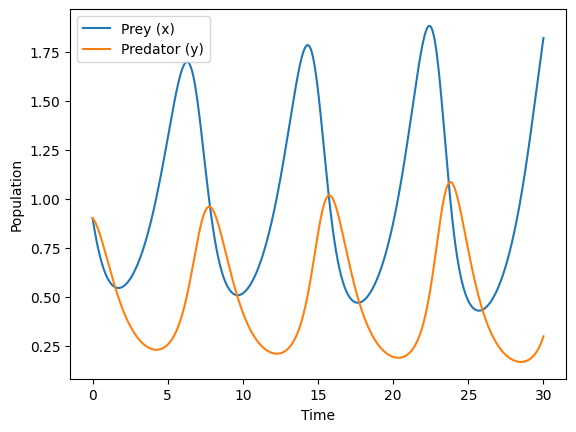

Method chosen: Eulers Method
dt/timestep: 800 
Solving took 0.003989219665527344 seconds.


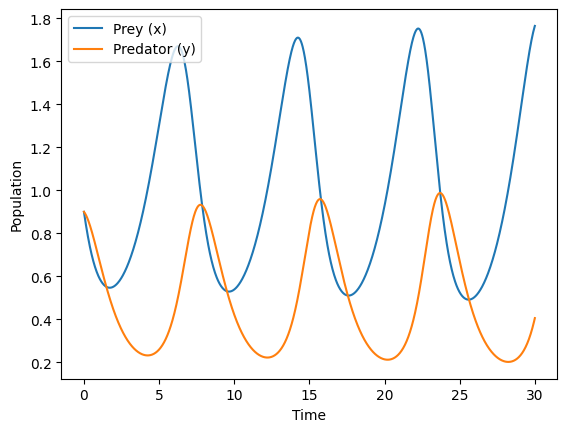

Method chosen: Eulers Method
dt/timestep: 1600 
Solving took 0.0069811344146728516 seconds.


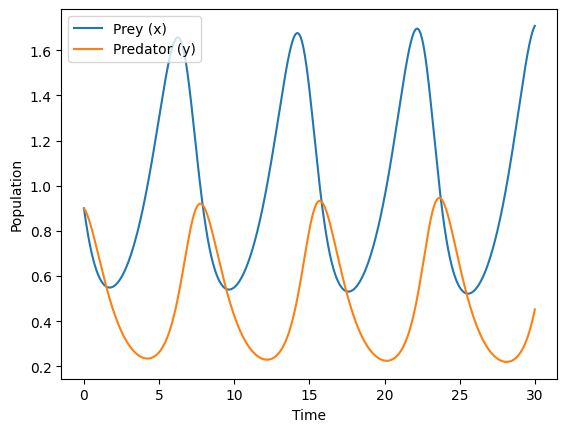

Method chosen: Eulers Method
dt/timestep: 3200 
Solving took 0.014959573745727539 seconds.


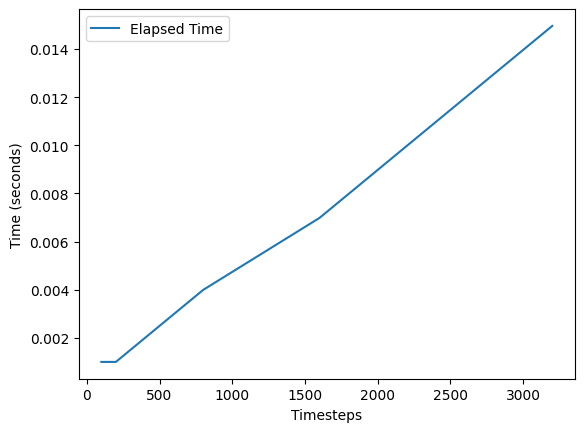

In [27]:
from solvers import solver
import numpy as np
import matplotlib.pyplot as plt
import time

def predator_prey_rhs_a(t, y):
    alpha = 1.0
    beta = 1.0
    gamma = 1.0
    delta = 1.0

    f_t = -np.sin(t) - (np.cos(t))**2 - np.cos(t)
    g_t = np.sin(t) + (np.cos(t))**2 - np.cos(t)

    dx_dt = alpha * y[0] - beta * y[0] * y[1] + f_t
    dy_dt = delta * y[0] * y[1] - gamma * y[1] + g_t

    return np.array([dx_dt, dy_dt])

def predator_prey_rhs_b(t, y):
    alpha = 2/3
    beta = 4/3
    gamma = 1.0
    delta = 1.0

    f_t = 0
    g_t = 0

    dx_dt = alpha * y[0] - beta * y[0] * y[1] + f_t
    dy_dt = delta * y[0] * y[1] - gamma * y[1] + g_t

    return np.array([dx_dt, dy_dt])

def eulers_theorem(rhs, y0, t0, dt, T):
    # calculate number of iterations
    steps = int(T / dt)
    y_out = np.empty((steps + 1, len(y0)))
    t_out = np.empty(steps + 1)

    # initial values
    y_out[0, :] = y0
    t_out[0] = t0

    # perform Euler's method iterations
    for i in range(steps):
        t_out[i+1] = t_out[i] + dt
        y_out[i+1, :] = y_out[i, :] + dt * rhs(t_out[i], y_out[i, :])

    return t_out, y_out

# setting up the simulation:
# change these depending on what you want to test
test_case = "b" 
solving_method = "Eulers"

# the timesteps to test
timesteps = [100, 200, 400, 800, 1600, 3200]

prey_errors_abs = []
predator_errors_abs = []
prey_errors_rel = []
predator_errors_rel = []
elapsed_times = []

# set up conditions for a 
if test_case == "a":
    initial_conditions = np.array([2.0, 0.0])
    T = 2.5 * np.pi     # final time
    t0= 0.0             # time 0

# set up conditions for b 
if test_case == "b":
    initial_conditions = np.array([0.9, 0.9])
    T = 30              # final time
    t0= 0.0             # time 0

# testing all conditions
for step in timesteps:

    dt = T / step  # timestep
    eulers = False

    # setting up the timing and using the solver or eulers method
    start_time = time.time()
    
    if solving_method == "Eulers":
         if test_case == "a":
            t, y = eulers_theorem(predator_prey_rhs_a, initial_conditions, t0, dt, T)
         else:
            t, y = eulers_theorem(predator_prey_rhs_b, initial_conditions, t0, dt, T)
         eulers = True

    else:
        method = solving_method
        if test_case == "a":
            t, y = solver(predator_prey_rhs_a, initial_conditions, t0, dt, T, method)
        else:
            t, y = solver(predator_prey_rhs_b, initial_conditions, t0, dt, T, method)

    end_time = time.time()

    # display the graph
    y = np.array(y)
    plt.plot(t, y[:, 0], label="Prey (x)")
    plt.plot(t, y[:, 1], label="Predator (y)")
    plt.xlabel("Time")
    plt.ylabel("Population")
    plt.legend()
    plt.show()

    # printing out the time for the calculation
    elapsed_time = end_time - start_time

    if eulers == True:
        print("Method chosen: Eulers Method")
    else:
        print(f"Method chosen: {method}")

    # here step is not the actual timestep but n in T/n
    # where n is [100, 200, 300, 400, 800, 1600]
    print(f"dt/timestep: {step} ")
    print(f"Solving took {elapsed_time} seconds.")

    if test_case == "a":
        # calculating error
        # by subtracting the expected value from the recieved value
        prey_error_abs = np.abs(y[:, 0] - (1 + np.cos(t)))
        predator_error_abs = np.abs(y[:, 1] - (1 - np.cos(t)))

        # adding a small epsilon to avoid division by zero
        epsilon = 1e-10

        # calculate the relative error by taking the mean of the ratio of the absolute corresponding value
        # plus adding the epsilion in case we divide by 0
        prey_error_rel = np.mean(prey_error_abs / (np.abs(y[:, 0]) + epsilon))
        predator_error_rel = np.mean(predator_error_abs / (np.abs(y[:, 1]) + epsilon))

        # Append errors and elapsed time to lists
        prey_errors_abs.append(np.mean(prey_error_abs))
        predator_errors_abs.append(np.mean(predator_error_abs))
        prey_errors_rel.append(prey_error_rel)
        predator_errors_rel.append(predator_error_rel)

        # print the errors
        print(f"Prey Absolute Error: {np.mean(prey_error_abs)}")
        print(f"Prey Relative Error: {prey_error_rel}")
        print(f"Predator Absolute Error: {np.mean(predator_error_abs)}")
        print(f"Predator Relative Error: {predator_error_rel}")

    # append to the time array
    elapsed_times.append(end_time - start_time)


# Plotting errors
if test_case == "a":
    plt.plot(timesteps, prey_errors_abs, label="Prey Absolute Error")
    plt.plot(timesteps, predator_errors_abs, label="Predator Absolute Error")
    plt.xlabel("Timesteps")
    plt.ylabel("Absolute Error")
    plt.legend()
    plt.show()

    plt.plot(timesteps, prey_errors_rel, label="Prey Relative Error")
    plt.plot(timesteps, predator_errors_rel, label="Predator Relative Error")
    plt.xlabel("Timesteps")
    plt.ylabel("Relative Error")
    plt.legend()
    plt.show()

# Plotting elapsed times
plt.plot(timesteps, elapsed_times, label="Elapsed Time")
plt.xlabel("Timesteps")
plt.ylabel("Time (seconds)")
plt.legend()
plt.show()


# RESULTS

*note again that the dt/timestep represents the value n where dt = T/n

The final graph provided is the graph plotted at the smallest timestep calculated (T/1600). This was to get the most accurate representation of how the graph should look in the end. Graphs at higher timesteps can be shown for every dt when the code above is ran

## Test case a:

### Heun Test case A
| Method chosen | dt/timestep | Solving Time (seconds) | Prey Absolute Error | Prey Relative Error | Predator Absolute Error | Predator Relative Error |
|---------------|-------------|-------------------------|---------------------|---------------------|-------------------------|-------------------------|
| Heun          | 100         | 0.001993417739868164    | 0.008595450455178254| 0.03537707351389855 | 0.0035654697150368773  | 0.038363547586724875  |
| Heun          | 200         | 0.004986286163330078    | 0.0022752799147707633| 0.016759769176414373| 0.0009358717215757151  | 0.019616772196238544  |
| Heun          | 400         | 0.008976221084594727    | 0.0005838989393872673| 0.008119698882336723| 0.00023943371119367865 | 0.009890958401702725  |
| Heun          | 800         | 0.018918752670288086    | 0.00014780497694186806| 0.0039910822819791926| 6.0532733528919296e-05 | 0.004960153281709961  |
| Heun          | 1600        | 0.03889632225036621     | 3.717624541677692e-05 | 0.001977861894781562 | 1.5216857067896678e-05 | 0.002482420851414555  |

#### Error and Efficiency Graphs:
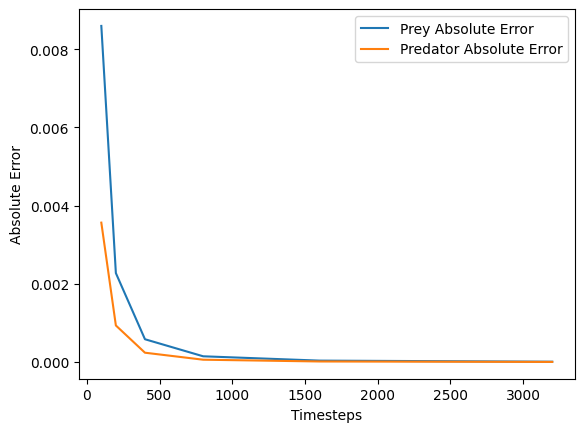
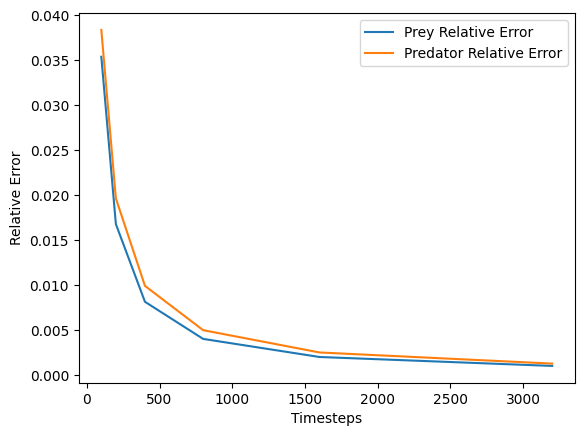
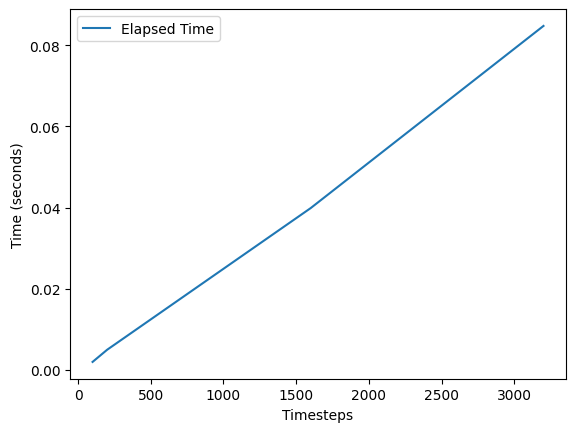

#### Graph at T/1600:
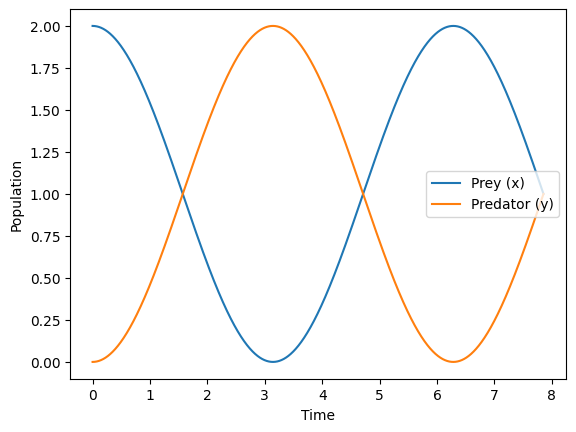

---

### 3/8-rule test case A
| Method chosen | dt/timestep | Solving Time (seconds) | Prey Absolute Error | Prey Relative Error | Predator Absolute Error | Predator Relative Error |
|---------------|-------------|-------------------------|---------------------|---------------------|-------------------------|-------------------------|
| 3/8-rule      | 100         | 0.005984067916870117    | 5.329483181895638e-06 | 0.009914175108828716 | 1.6839212241420512e-06 | 0.009923802468696945  |
| 3/8-rule      | 200         | 0.00997304916381836     | 3.353867191031815e-07 | 0.004969275692015674 | 1.0642567666865335e-07 | 0.004974380705913474  |
| 3/8-rule      | 400         | 0.01994490623474121     | 2.1041309365026412e-08 | 0.0024358183570934323 | 6.694033465882291e-09 | 0.002465146383976678  |
| 3/8-rule      | 800         | 0.039893150329589844    | 1.3175634431387194e-09 | 0.0009041308889532689 | 4.197456110301806e-10 | 0.0010507919817667657 |
| 3/8-rule      | 1600        | 0.07978534698486328     | 8.230131175464922e-11 | 8.812156155804882e-05 | 2.625856638375839e-11 | 0.00015564560942365544|

#### Error and Efficiency Graphs:
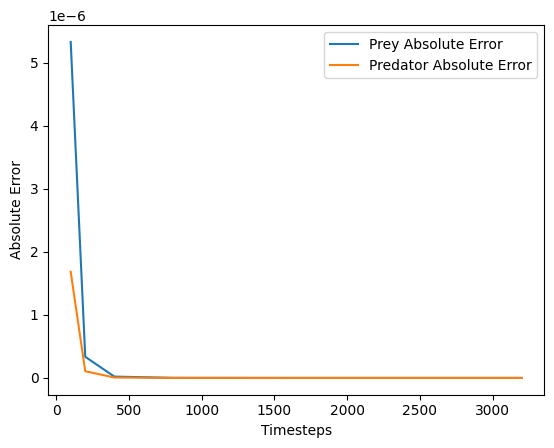
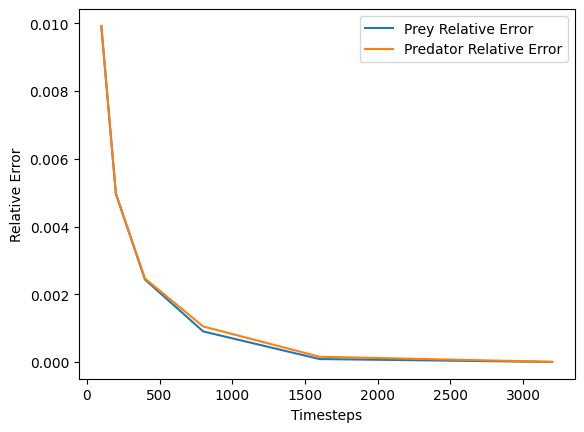
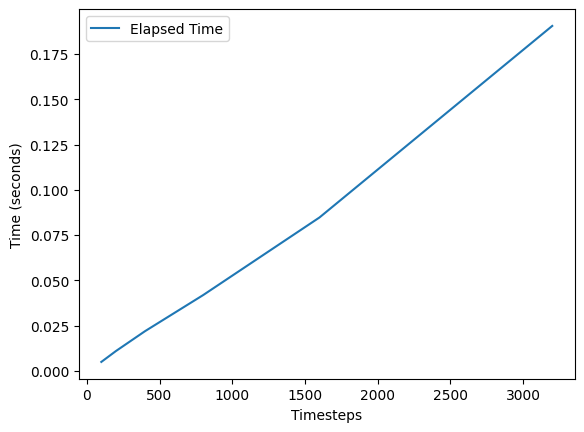

#### Graph at T/1600:
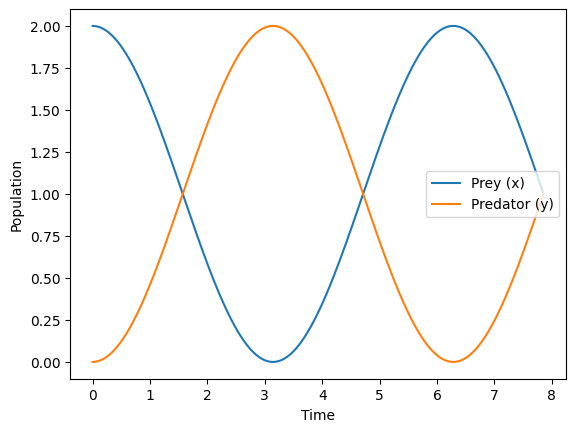

---

### Eulers test case A

| Method chosen | dt/timestep | Solving Time (seconds) | Prey Absolute Error | Prey Relative Error | Predator Absolute Error | Predator Relative Error |
|---------------|-------------|-------------------------|---------------------|---------------------|-------------------------|-------------------------|
| Euler's       | 100         | 0.001995086669921875    | 0.08767568346649879 | 0.12633758295998426 | 0.07000969516982726    | 305215.52356599114     |
| Euler's       | 200         | 0.0019936561584472656   | 0.04285087018233246 | 0.07881334378536309 | 0.0338439003220605     | 38356.82301453856      |
| Euler's       | 400         | 0.003990650177001953    | 0.021202148718914408| 0.04974646863063382 | 0.016656536971596393   | 4807.400316134684      |
| Euler's       | 800         | 0.006981849670410156    | 0.010548092086151026| 0.031848578352677064| 0.008264437602321578   | 601.8663307796874      |
| Euler's       | 1600        | 0.013962507247924805    | 0.005261165506737418| 0.020727502417715003| 0.004116568742687019   | 75.41622936349086      |

#### Error and Efficiency Graphs:
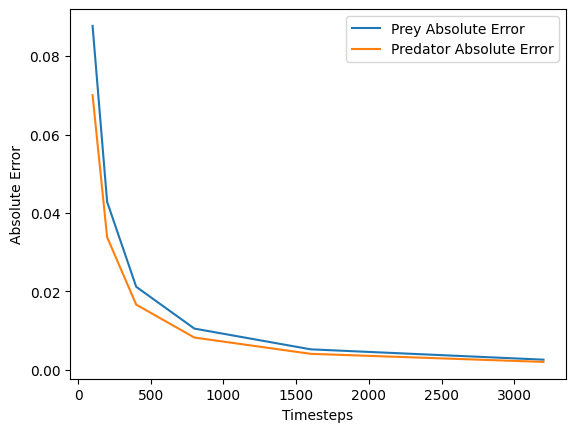
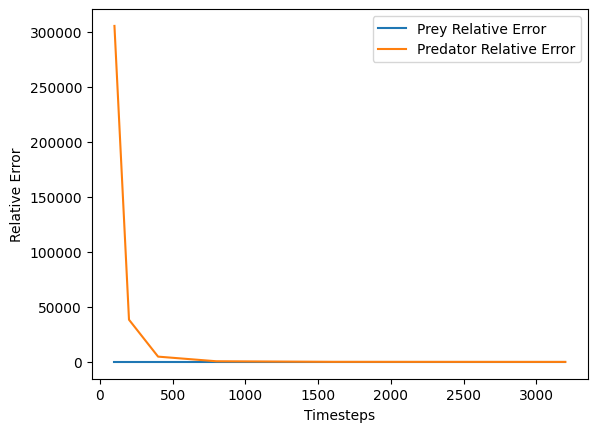
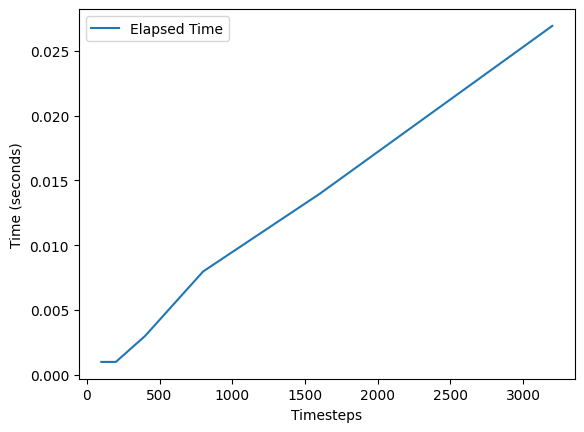

*note the extremely high relative error for the Predator for eulers method

#### Graph at T/1600:
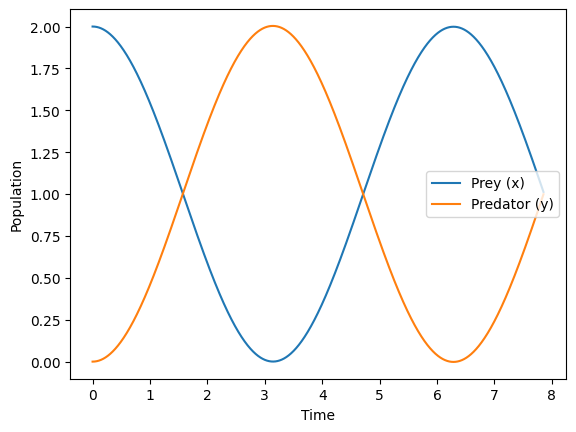

---

## Test Case B
Test case b does not have an exact answer, so we cannot calculate the relative or absolute error values.<br>
The graphs remained consistent using the solvers, however the maximal values were increasing when using eulers method<br>

### Heun test case B
| Method chosen  | dt/timestep | Solving Time (seconds) | 
|-----------------|-------------|-------------------------|
| Heun            | 100         | 0.001993894577026367    | 
| Heun            | 200         | 0.0029921531677246094   | 
| Heun            | 400         | 0.00698089599609375     | 
| Heun            | 800         | 0.011968612670898438    | 
| Heun            | 1600        | 0.023935317993164062    | 

#### Efficiency Graph:
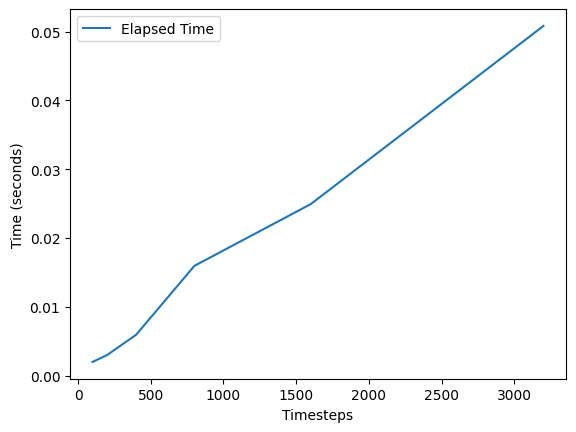

#### Graph at T/1600:
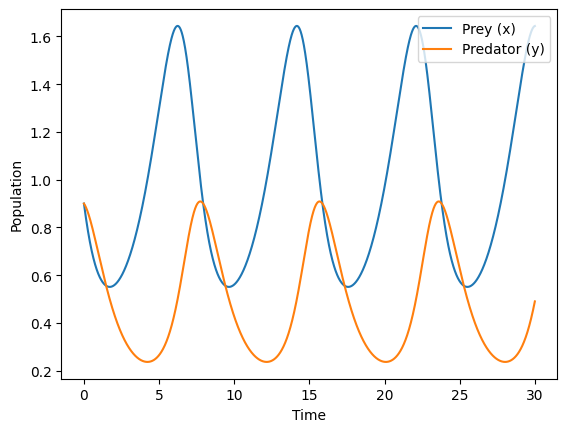

---

### 3/8-rule test case B
| Method chosen  | dt/timestep | Solving Time (seconds) | 
|-----------------|-------------|-------------------------|
| 3/8-rule        | 100         | 0.005984783172607422    | 
| 3/8-rule        | 200         | 0.006981611251831055    | 
| 3/8-rule        | 400         | 0.013992071151733398    | 
| 3/8-rule        | 800         | 0.02792501449584961     | 
| 3/8-rule        | 1600        | 0.05584979057312012     | 

#### Efficiency Graph:
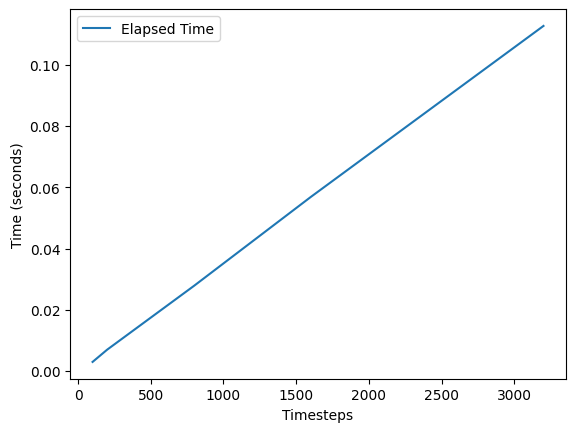

#### Graph at T/1600:
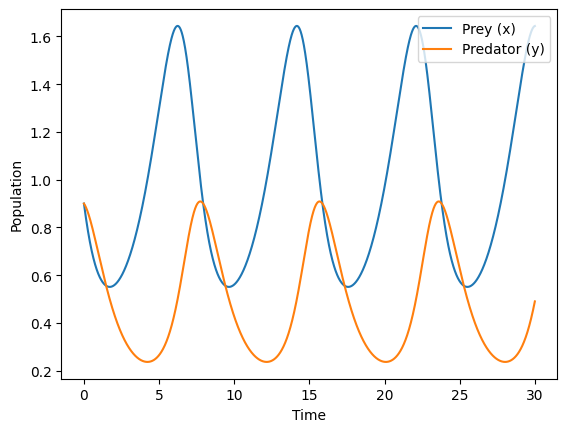

---

### Eulers Method test case B
| Method chosen  | dt/timestep | Solving Time (seconds) | 
|-----------------|-------------|-------------------------|
| Eulers Method   | 100         | 0.0009968280792236328   | 
| Eulers Method   | 200         | 0.0009963512420654297   | 
| Eulers Method   | 400         | 0.0019941329956054688   | 
| Eulers Method   | 800         | 0.003989458084106445    | 
| Eulers Method   | 1600        | 0.007978677749633789    | 

#### Efficiency Graph:
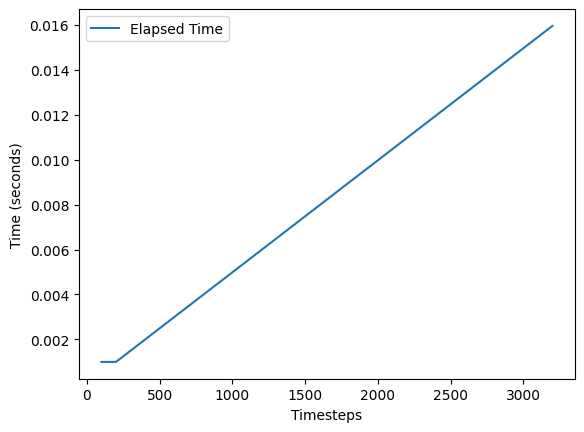

#### Graph at T/1600:
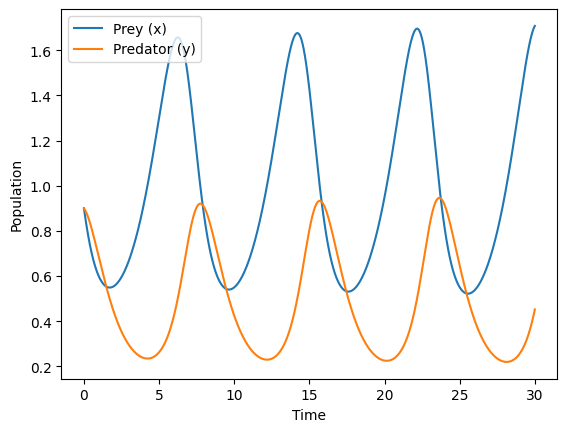

---

# ANALYSIS
## Huen Method
The Heun method proves to be a reliable choice, striking a balance between computational efficiency and accuracy. In terms of efficiency, this method has reasonable and consistent computational times for both test cases. The resulting graph is almost linear, as the timestep decreases (T/n, n increasing), the computation time increases, demonstrating the robustness and consistency of this method. This trend indicates a predictable performance, making it suitable for many timeframes. The method is very robust, evident by its stability across both test cases and and timesteps. The graphs remain consistent, even at larger timesteps, and the absolute and relative errors consistently decrease as the timesteps decrease. This means that this method is accurate, and based on the graph, will continue to get more accurate as you decrease the timescale even further.
According to Burden and J. Douglas Faires (2010), The Heun method improves upon Euler's method by taking a weighted average of slopes at the beginning and end of each time step, providing increased accuracy, better stability, and consistency with the midpoint method. It is also a 3rd order method, and higher order methods are more accurate as they use higher order approximations which provide a more accurate portrayal of the curve of the function.
- *Burden, R.L. and J. Douglas Faires 2010. Numerical Analysis. Brooks/Cole.*

## 3/8-rule Method
The 3/8-rule Method also demonstrates a balance between computational efficiency and accuracy. While having slightly slower computational times than Heun or Euler's Methods, it is only very slightly and is still very reasonable, and it boasts the most accurate results. Looking at the graph, it demonstrates and linear relationship between the computational speed, similar to the Heun Method, but it remains linear even at the higher timesteps. In terms of robustness, the 3/8 rule demonstrates consistent results and stability across various timesteps. Both absolute and relative errors converge to extremely low values as the timestep decreases, demonstrating the method's reliability in getting accurate solutions. The 3/8-rule method's ability to provide accurate and stable results positions it as a robust solver for predator-prey dynamics simulations.
The 3/8-rule is a 4th-order method that approximates the designed for numerical integration, particularly effective for approximating definite integrals involving cubic polynomials, according to Burden and J. Douglas Faires (2010). 
- *Burden, R.L. and J. Douglas Faires 2010. Numerical Analysis. Brooks/Cole.*

## Euler's Method
Euler's Method, despite having the highest efficiency in terms of computational time, falls short in accuracy and robustness for this problem. The method exhibits the fastest computational times among the tested solvers; however, this efficiency is compromised by large instabilities and errors, especially within the higher timesteps. Only when we test timescales of T/12800 do we get a relative error for the predator, and for most larger timesteps the error is insanely huge. This is an issue because at this point the computation time is much higher to get the same accuracy as the the other methods, as it requires a much smaller timestep. The graphs also show that the results are not very consistent. Unlike the graphs of the other methods, where the maximal peaks are consistent, this one contains changing maximal peaks. Only at very small timescales, do the maximal peaks start to become even and look like the other graphs. This method may be suitable for quick simulations where precision is not vital, but its limitations make it less favourable for problems demanding accurate solutions. Even still, it requires such a small timestep, which would increase the computation time greatly. 
Euler's method is the most basic, 1st order method that laid the foundation for subsequent methods. It is simple to implement, however as it relies on a series of linear approximations over many small intervals, it can lead to many errors that can accumulate over time.

---


# CONCLUSION

After comparing the results obtained from the Heun method, the 3/8-rule method, and Euler's method, it is evident that each method has its strengths and weaknesses in solving the predator-prey dynamics problem. We can see that the 3/8 rule is the best option out of the three methods studied. The Heun method, however, is very close in efficiency and accuracy but loses out on accuracy, which I would prioritise for this conclusion. However, in situations where we would want to prioritise efficiency, and still have good accuracy, Heun would be better, despite Euler's faster speed. 

The numerical methods employed in the solver utilize arrays derived from the equations of the methods, emphasizing that the higher-order methods are employed directly during the problem-solving process. Higher-order methods, such as the 3/8-rule Method, are characterized by more intricate mathematical formulations that capture finer details of the underlying dynamics. Consequently, these methods can provide more accurate results, especially when dealing with complex systems like predator-prey models. Lower-order methods, such as Euler's method, which isn't provided but coded manually, oversimplify the problem and miss out on the intricate details that the higher-order methods will consider. In scenarios where precision is important, the advantages of higher-order methods, despite potential increases in computational time, outweigh the benefits of faster but less accurate techniques.

In summary, finding the best method for the predator-prey problem means balancing computational speed and accuracy. If you need precise results, go for the 3/8-rule method. For a good compromise between speed and accuracy, the Heun method is a reliable choice. The key is matching the method's order to the complexity of your problem, ensuring a practical solution.